## 现金分期利率浅析


### 背景

某银行现金分期业务一再强调:这是超低费率的产品，只有征信水平极佳的客户才能享受这一优惠！

授信额度|分期总数|首月利率|月手续费
----|----|----
142000|24|0.45%|639
条件看起来非常诱人，以利率来衡量时这笔资金的真正利率水平如何。对此，我也非常感兴趣，遂决定以简单的数据分析手段来找出这数据背后的“秘密。

通过对现金分期的资金真实使用成本的分析，找到以等额本金形式还款时首月利率为0.45%时24期现金分期的真实利率水平。并分析现金分期与普通贷款相比对银行和借款人的益处，作为公司实体如何使用类似于现金分期的形式为客户提供金融服务并扩大自己的收益。

### 24期等额本息，24期等额本金，现金分期

* 等额本息：等额本息还款法即把贷款本金总额与利息总额相加，然后平摊到还款期限的每个月中，每个月的还款额是固定的，但每月还款额中本金比例逐月增加，利息比重逐月递减。

* 每月还款额=[贷款本金x月利率x(1+月利率)^还款月数]/{[(1+月利率)^还款月数]-1}

In [2]:
%%HTML

<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="点击按钮显示/隐藏文档代码！"></form>

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ['Arial Unicode MS', 'Microsoft Yahei', 'SimHei', 'sans-serif']

In [31]:
#本金
a=142000
#每月还款额=[贷款本金x月利率x(1+月利率)^还款月数]/{[(1+月利率)^还款月数]-1}
b=round((a*0.0045*(1+0.0045)**24)/((1+0.0045)**24-1),3)

benxi=pd.DataFrame(
    {
        '期数': np.arange(1,25),
        '月利率':np.full((24), 0.0045),
        '年利率':np.full((24),0.054),
        '每月还款额':np.full((24),b),
        '剩余本金':np.full((24),142000.000),
        '所还利息':np.full((24),0.0),
        '所还本金':np.full((24),0.0)
    }
    
)

for i in range(24):
    
    benxi.loc[[i,],['所还利息']]=benxi.loc[[i,],'剩余本金']*benxi.loc[[i,],'月利率']
    benxi.loc[[i,],['所还本金']]=benxi.loc[[i,],'每月还款额']-benxi.loc[[i,],'所还利息']
    if i <23:
        benxi['剩余本金'][i+1]=benxi['剩余本金'][i]-benxi['所还本金'][i]
    
    

benxi


E:\anaconda\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,剩余本金,年利率,所还利息,所还本金,月利率,期数,每月还款额
0,142000.000000,0.054,639.000000,5616.206000,0.0045,1,6255.206
1,136383.794000,0.054,613.727073,5641.478927,0.0045,2,6255.206
2,130742.315073,0.054,588.340418,5666.865582,0.0045,3,6255.206
3,125075.449491,0.054,562.839523,5692.366477,0.0045,4,6255.206
4,119383.083014,0.054,537.223874,5717.982126,0.0045,5,6255.206
5,113665.100887,0.054,511.492954,5743.713046,0.0045,6,6255.206
6,107921.387841,0.054,485.646245,5769.559755,0.0045,7,6255.206
7,102151.828086,0.054,459.683226,5795.522774,0.0045,8,6255.206
8,96356.305313,0.054,433.603374,5821.602626,0.0045,9,6255.206
9,90534.702687,0.054,407.406162,5847.799838,0.0045,10,6255.206


* 等额本金： 等额本金还款方式比较简单，顾名思义，这种还款方式下，每次还款的本金数目都是一样的。
* 每月还款额=每月还款额=(总贷款额÷借款总期数)＋总贷款额×当期剩余还款期数÷总期数×月利率。


In [32]:
#本金
a=142000
#所还本金
b=round(a/24,3)
benjin=pd.DataFrame(
    {
        
        '期数':np.arange(1,25),
        '月利率':np.full((24),0.0045),
        '年利率':np.full((24),0.054),
        '每月还款额':np.full((24),0.0),
        '剩余本金':np.full((24),142000.000),
        '所还利息':np.full((24),0.0),
        '所还本金':np.full((24),b)
    }
)
for i in range(24):
    benjin["所还利息"][i]=benjin["剩余本金"][i]*benjin["月利率"][i]
    benjin["每月还款额"][i]=benjin["所还本金"][i]+benjin["所还利息"][i]
    if i<23:
        benjin["剩余本金"][i+1]=benjin["剩余本金"][i]-benjin["所还本金"][i]
    
benjin

E:\anaconda\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
E:\anaconda\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
E:\anaconda\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,剩余本金,年利率,所还利息,所还本金,月利率,期数,每月还款额
0,142000.000,0.054,639.000000,5916.667,0.0045,1,6555.667000
1,136083.333,0.054,612.374999,5916.667,0.0045,2,6529.041999
2,130166.666,0.054,585.749997,5916.667,0.0045,3,6502.416997
3,124249.999,0.054,559.124995,5916.667,0.0045,4,6475.791996
4,118333.332,0.054,532.499994,5916.667,0.0045,5,6449.166994
5,112416.665,0.054,505.874993,5916.667,0.0045,6,6422.541993
6,106499.998,0.054,479.249991,5916.667,0.0045,7,6395.916991
7,100583.331,0.054,452.624989,5916.667,0.0045,8,6369.291990
8,94666.664,0.054,425.999988,5916.667,0.0045,9,6342.666988
9,88749.997,0.054,399.374986,5916.667,0.0045,10,6316.041987


* 现金分期手续费：相当于使用此笔现金分期每期需要付的费用，与利率是不同的两个概念。
* 每月还款额= (总贷款额÷借款总期数)＋每期手续费

In [33]:
#本金
a=142000
#所还本金
b=round(a/24,3)
#所还手续费
c=a*0.0045
#每月还款额
t=b+c
fenqi=pd.DataFrame(
    {
        '期数':np.arange(1,25),
        '月利率':np.full((24),0.0045),
        '年利率':np.full((24),0.054),
        '每月还款额':np.full((24),t),
        '剩余本金':np.full((24),142000.000),
        '所还手续费':np.full((24),c),
        '所还本金':np.full((24),b)

    }
)
for i in range(1,24):
    fenqi["剩余本金"][i]=fenqi["剩余本金"][i-1]-fenqi["所还本金"][i-1]
    fenqi["月利率"][i]=fenqi["所还手续费"][i]/fenqi["剩余本金"][i]
    fenqi["年利率"][i]=fenqi["月利率"][i]*12
    
    
fenqi   

E:\anaconda\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
E:\anaconda\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
E:\anaconda\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,剩余本金,年利率,所还手续费,所还本金,月利率,期数,每月还款额
0,142000.000,0.054000,639.0,5916.667,0.004500,1,6555.667
1,136083.333,0.056348,639.0,5916.667,0.004696,2,6555.667
2,130166.666,0.058909,639.0,5916.667,0.004909,3,6555.667
3,124249.999,0.061714,639.0,5916.667,0.005143,4,6555.667
4,118333.332,0.064800,639.0,5916.667,0.005400,5,6555.667
5,112416.665,0.068211,639.0,5916.667,0.005684,6,6555.667
6,106499.998,0.072000,639.0,5916.667,0.006000,7,6555.667
7,100583.331,0.076235,639.0,5916.667,0.006353,8,6555.667
8,94666.664,0.081000,639.0,5916.667,0.006750,9,6555.667
9,88749.997,0.086400,639.0,5916.667,0.007200,10,6555.667


### 现金分期与等额本息/本金对比分析

<Container object of 3 artists>

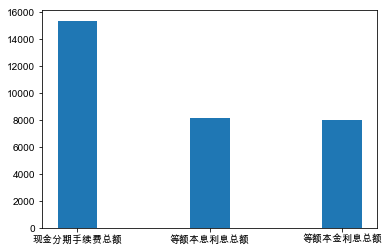

In [64]:
a=[round(benxi["所还利息"].sum(),3),
round(benjin["所还利息"].sum(),3),
round(fenqi["所还手续费"].sum(),3),]
b=["等额本息利息总额","等额本金利息总额","现金分期手续费总额"]

# plt.subplot(2,1,1)
plt.bar(b,a,width = 0.3)

<Container object of 3 artists>

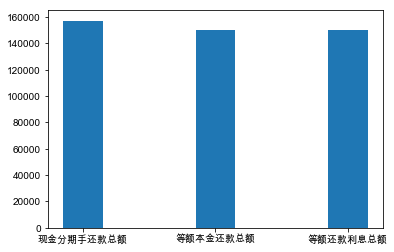

In [63]:
c=[round(benxi["每月还款额"].sum(),4),
round(benjin["每月还款额"].sum(),4),
round(fenqi["每月还款额"].sum(),4),]
d=["等额还款利息总额","等额本金还款总额","现金分期手还款总额"]
plt.bar(d,c,width = 0.3)


从上面两图可以明显看出：现金分期是一种区别于等额本息/本金的独立业务
现金分期的实质是在销售过程中以偷换概念的方式误导客户以为首期利率即为整个过程中的真实利率，从而觉得资金使用成本低而借贷。

### 首月利率为0.45%时现金分期月利率
月利率的变化趋势是先逐步平稳增加，到最后两三期时加速升高，最后到达惊人的10.80%（年化利率129.60%）

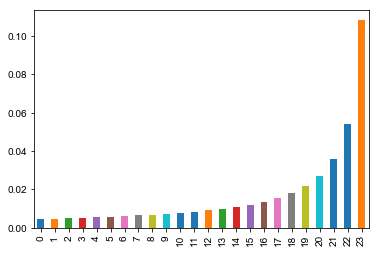

In [84]:
fenqi["月利率"].plot.bar()


### 现金分期资金真实使用成本


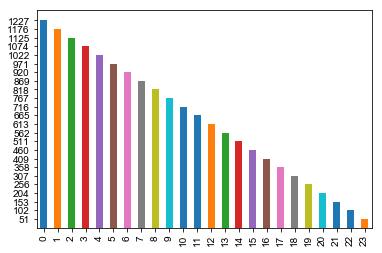

In [110]:
x=fenqi["剩余本金"].sum()
y=fenqi["所还手续费"].sum()
#平均月利率
lilv=y/x
a=fenqi["剩余本金"]*lilv
a.plot.bar().yaxis.set_ticks(a)
plt.show()

### 等额本息/本金月利率0.45%月息变化

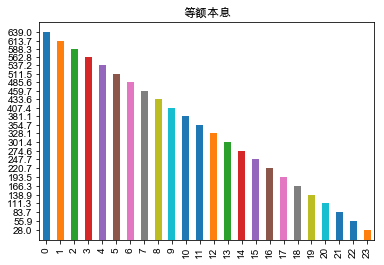

In [116]:
a=benxi["所还利息"]
a.plot.bar().yaxis.set_ticks(a)
plt.title("等额本息")
plt.show()

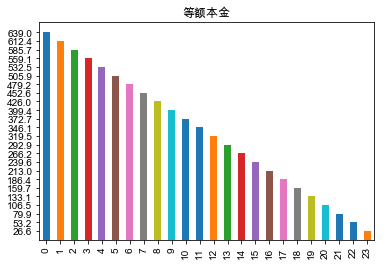

In [117]:
a=benjin["所还利息"]
a.plot.bar().yaxis.set_ticks(a)
plt.title("等额本金")
plt.show()

真实月利率=手续费总额÷总的每期剩余本金=15336÷1775000=0.864%
银行不告诉客户的真实原因可能是：
       1.让客户感觉便宜(月利率0.45%与平均月利率0.864%对比)
       2.减轻客户初期还款压力(初期月息1226.88与639对比)

### 现金分期对银行的益处浅析

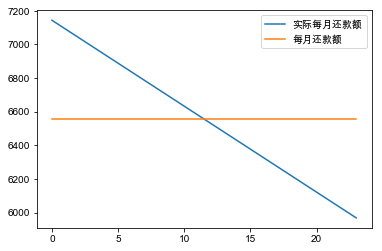

In [129]:
x=fenqi["剩余本金"].sum()
y=fenqi["所还手续费"].sum()
#平均月利率
lilv=y/x
fenqi["实际每月还款额"]=fenqi["剩余本金"]*lilv+fenqi["所还本金"]
a=fenqi[["实际每月还款额","每月还款额"]]
a.plot()

* 利于风险控制
    * 能及时发现违约风险(未还款当期即可发现)
    * 额度根据客户征信情况而定，风险水平更低。
* 利于产品销售
    * 客户初期还款压力小(首月还7143.55与6555.67对比)
    * 让客户感觉便宜(首月费率等于0.45%)
* 实际收益可观(年化收益率达到10.37%)


### 对借款人益处浅析

* 获取资金更加方便快捷
     * 传统贷款需要办理各种抵押、各种手续，所以有种种不便；现金分期是凭信用借款，更加方便快捷。
* 还款压力小
    * 传统贷款到期还款时本息压力大
        到期后传统贷款需还本息合计（以10%年利率计算）：170400
    * 分期压力小
        相当于把压力平均分成24份，每期还款压力变小，总还款额也变小      
         (分期还款总额157336，比传统贷款减少13064)
* 流动资金增大
     * 能够有资金用于房贷首付等大额支出
